In [2]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [3]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import keras

# Define paths to your dataset
directory = r'/home/arsenal/ml/OCT2017/train'

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% for validation

# Load and preprocess the training and validation datasets
train_generator = datagen.flow_from_directory(
    directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training',
    shuffle=False
)

val_generator = datagen.flow_from_directory(
    directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='validation',
    shuffle=False
)

Found 66792 images belonging to 4 classes.
Found 16697 images belonging to 4 classes.


In [4]:
# Load a pre-trained model (e.g., VGG16) and remove the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
model = Model(inputs=base_model.input, outputs=x)

# Extract features using the pre-trained model
train_features = model.predict(train_generator)
val_features = model.predict(val_generator)

# Get the labels
train_labels = train_generator.classes
val_labels = val_generator.classes

2024-12-20 15:57:11.672644: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-20 15:57:11.695917: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-20 15:57:11.695961: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-20 15:57:11.698687: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-20 15:57:11.698721: I external/local_xla/xla/stream_executor

   2/2088 ━━━━━━━━━━━━━━━━━━━━ 4:18 124ms/step 

I0000 00:00:1734710250.390776    5887 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2077/2088 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step

2024-12-20 16:01:24.587385: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-20 16:01:25.263264: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.58GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-20 16:01:26.002528: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.21GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-12-20 16:01:31.977109: E external/local_xla/xla/service/slow_o

2088/2088 ━━━━━━━━━━━━━━━━━━━━ 252s 113ms/step
481/522 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step 

2024-12-20 16:02:32.042779: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng33{k2=2,k6=0,k13=2,k14=0,k22=2} for conv (f32[25,64,256,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[25,3,256,256]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-12-20 16:02:32.088308: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 5.450592453s
Trying algorithm eng33{k2=2,k6=0,k13=2,k14=0,k22=2} for conv (f32[25,64,256,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[25,3,256,256]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationF

522/522 ━━━━━━━━━━━━━━━━━━━━ 70s 133ms/step


In [7]:
# Split the validation set into validation and test sets
val_features, test_features, val_labels, test_labels = train_test_split(val_features, val_labels, test_size=0.5, random_state=42)

# Train a RandomForestClassifier on the extracted features

rf = RandomForestClassifier(n_estimators=100, random_state=42)
history = rf.fit(train_features, train_labels)

# Evaluate the RandomForestClassifier on the validation set
val_predictions = rf.predict(val_features)
val_accuracy = accuracy_score(val_labels, val_predictions)
print(f'Validation Accuracy: {val_accuracy}')
print(classification_report(val_labels, val_predictions))

# Evaluate the RandomForestClassifier on the test set
test_predictions = rf.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f'Test Accuracy: {test_accuracy}')
print(classification_report(test_labels, test_predictions))

Validation Accuracy: 0.8394825107810254
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       926
           1       0.85      0.52      0.65       264
           2       0.89      0.17      0.29       194
           3       0.81      0.97      0.89       703

    accuracy                           0.84      2087
   macro avg       0.85      0.66      0.68      2087
weighted avg       0.84      0.84      0.81      2087

Test Accuracy: 0.8116914230953521
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       944
           1       0.88      0.52      0.65       297
           2       0.85      0.19      0.32       236
           3       0.77      0.97      0.86       610

    accuracy                           0.81      2087
   macro avg       0.83      0.66      0.68      2087
weighted avg       0.82      0.81      0.78      2087



In [16]:
# Plot accuracy over different numbers of trees
n_estimators = [10, 50, 100, 200, 500]
train_accuracies = []
val_accuracies = []
import matplotlib as plt
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(train_features, train_labels)
    train_accuracies.append(rf.score(train_features, train_labels))
    val_accuracies.append(rf.score(val_features, val_labels))


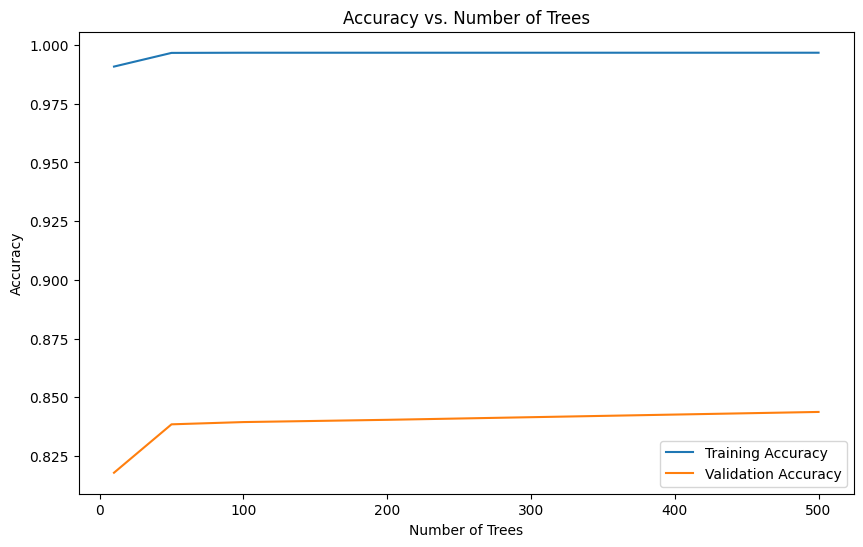

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, train_accuracies, label='Training Accuracy')
plt.plot(n_estimators, val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Trees')
plt.legend()
plt.show()

In [19]:
history_df = pd.DataFrame(history)

# Save the DataFrame to a CSV file
history_df.to_csv('training_history_RF_new.csv', index=False)

log_dir='assets/logs/rf_model'

# Manually log additional metrics to TensorBoard
with tf.summary.create_file_writer(log_dir).as_default():
    for epoch, metrics in enumerate(history['accuracy']):
        tf.summary.scalar('accuracy', metrics, step=epoch)
    for epoch, metrics in enumerate(history['val_accuracy']):
        tf.summary.scalar('val_accuracy', metrics, step=epoch)
    for epoch, metrics in enumerate(history['loss']):
        tf.summary.scalar('loss', metrics, step=epoch)
    for epoch, metrics in enumerate(history['val_loss']):
        tf.summary.scalar('val_loss', metrics, step=epoch)

TypeError: list indices must be integers or slices, not str